# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np


import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [3]:
# 1)
Z = np.zeros((3, 4), dtype=int)
print(Z)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [4]:
# 2)
M = np.array([[1, 2, 3, 4, 5]])
A = np.diag(M[0])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [5]:
# 3)
print(np.trace(A))

15


In [6]:
# 4)
A1 = np.linalg.inv(A)
print(A1)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [7]:
# 5)
X = np.random.rand(4, 5)
print(X)

[[0.39957865 0.88543093 0.85335565 0.24925411 0.53943938]
 [0.08140693 0.07126718 0.08054111 0.13338413 0.43755166]
 [0.43341589 0.65053817 0.97715404 0.03150508 0.02069361]
 [0.39653721 0.36912984 0.55582062 0.11123452 0.29168601]]


In [8]:
# 6)
X1 = X[np.ix_((1, 2), (0, 1))]
print(np.linalg.det(X1))

0.022069984834201088


In [9]:
# 7)
print(X.dot(X.T))

[[2.02498934 0.43363998 1.60206599 1.14467202]
 [0.43363998 0.22743575 0.17360294 0.24581874]
 [1.60206599 0.17360294 1.56730007 0.96466143]
 [1.14467202 0.24581874 0.96466143 0.699889  ]]




## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [97]:
from copy import deepcopy


def move_zeros(matrix, sz, row_start_index, col_index):
    count_of_swaps = 0
    column = []
    temporary_column = matrix[:, col_index]
    for i in range(row_start_index, sz):
        column.append((temporary_column[i], i))
    for i in range(len(column)):
        is_sorted = True
        for j in range(len(column) - i - 1):
            if abs(column[j][0]) < abs(column[j + 1][0]):
                column[j], column[j + 1] = column[j + 1], column[j]
                is_sorted = False
                count_of_swaps += 1
        if is_sorted:
            break
    new_matrix = matrix[:row_start_index, :]
    for i in column:
        t = matrix[i[1],:]
        new_matrix = np.concatenate((new_matrix, [t]), axis=0)
    return new_matrix, count_of_swaps


def my_det(X):
    """
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    """
    sz = X.shape
    if sz[0] != sz[1]:
        raise ValueError
    else:
        """
        Итак, как же найти определитель с помощью преобразований строк?
        Достаточно удобно получится, если матрица приведется к верхнетреугольному виду.
        Как это сделала я:
            - я ходила по столбцам матрицы, сортировала сначала строки таким образом,
            чтобы в данном столбике нули оказались снизу (тогда изменялся знак определителя)
            (таким занимается функция move_zeroes)
            - затем, преобразовывала матрицу с помощью преобразований первого типа
            (нулевых элементов при делении встретиться не могло благодаря сортировке)
            - если в какой-то момент уже в главной диагонали после сортировки встречался 0, определитель равен нулю
        """
        row_index = 0
        matrix = X.astype(float).copy()
        sign = 0
        for col in range(0, sz[0] - 1):
            matrix, cnt = move_zeros(matrix, sz[0], row_index, col)
            matrix = deepcopy(matrix)
            sign += cnt
            if matrix[row_index, col] == 0:
                return 0
            for row in range(row_index + 1, sz[0]):
                if matrix[row, col] == 0:
                    break
                scalar = -matrix[row, col] / matrix[row_index, col]

                for i in range(sz[0]):
                    matrix[row, i] = float(matrix[row, i] + matrix[row_index, i]*scalar)
            row_index += 1
        # print(matrix)
        det = 1
        for i in range(sz[0]):
            det *= matrix[i, i]
        det *= (-1)**sign
        return det

Простая проверка:

In [82]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))
print(np.linalg.det(X))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
-0.0
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        # print(my_det(X), sla.det(X))
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

9.51 µs ± 451 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
507 µs ± 993 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
234 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
313 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_51549/2037357516.py:64: RuntimeWarning: overflow encountered in double_scalars
  det *= matrix[i, i]


6min 45s ± 5.45 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


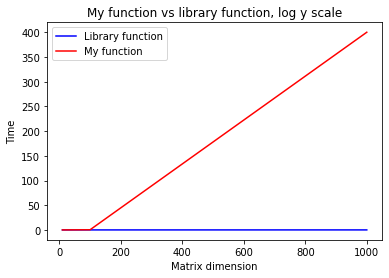

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

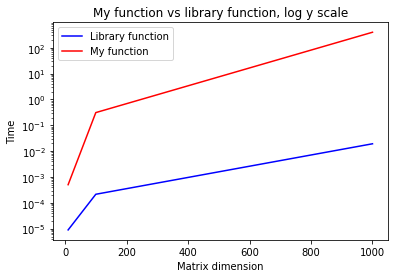

In [103]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [107]:
A1 = np.array([[1, 0], [10**20, 1]])
B1 = np.array([[10**(-20), 1], [0, 1 - 10**20]])
print(A1.dot(B1))
A2 = np.array([[1., 0.], [10.**20, 1.]])
B2 = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])
print(A2.dot(B2))
# Your code here

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Первый**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

заметим, что в матрице Паскаля на всех местах первой строки и на всех мастах первого столбца стоят только единицы.

Также заметим, что $C_{i + j}^{i} = \frac{(i+j)!}{i!j!} = \frac{(i+j - 1)!(i + j)}{i!j!} = \frac{i(i+j)!}{i!j!} + \frac{j(i+j)!}{i!j!} =  \frac{(i+j)!}{(i - 1)!j!} + \frac{(i+j)!}{i!(j - 1)!} $

То есть, элемент на (i,j) месте равен сумме элементов на (i, j-1) месте и на (i-1, j) месте



In [11]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0, i] = 1
        P[i, 0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i - 1, j] + P[i, j - 1]
    return P

print(my_pascal(5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


Чему равен её определитель? Строго поясните свой ответ.

----
Итак, элемент на (i,j) месте равен сумме элементов на (i, j-1) месте и на (i-1, j) месте. Тогда при вычитании из k-ой строки из (k + 1)-ой строки, на месте (k + 1, q) окажется элемент, стоявший ранее на месте (k + 1, q - 1) для всех q > 0: на первом месте в строке окажется 0

Можно сказать, что после вычитания соседней строки сверху, нижняя строка сдвинется на 1 вправо.

Последовательно вычитая из нижней строки соседнюю верхнюю, начиная с самой нижней, получим, что все строки матрицы, кроме первой, сдвинулись на 1 вправо, а значит теперь при вычитании из строки соседней сверху опять получится сдвиг строки на 1 вправо.

За n - 2 вычитания можно сдвинуть все строки, находящиеся ниже второй вправо еще на один, и так далее. При этом первый (слева) ненулевой элемент в строке всегда будет равен единицы. Тогда, через некоторое количество вычитаний, последняя строка сдвинется вправо на n - 1 (то есть элемент на позиции (n, n) станет равен 1), n - 1 строку - сдвинуть вправо на n - 2, и так далее. Получится верхнетреугольная матрица с диагонялью единиц, ее определитель будет равен единице.

Ответ: 1

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [112]:
print(sla.det(my_pascal(30)))

-4.361831882184299e+51


Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

Решения этой системы - $x_1 = 4, x_2 = 2$

In [113]:
print(sla.det(np.array([[1, 1000], [100, 100001]])))

1.0000000000047748


Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [115]:
# Так как система совместна, решим по формуле Крамера
matrix = np.array([[1, 1000], [100, 100001]])
X1_matrix = np.array([[2004.01, 1000], [200402, 100001]])
X2_matrix = np.array([[1, 2004.01], [100, 200402]])
print("x1 = ", sla.det(X1_matrix)/sla.det(matrix))
print("x2 = ", sla.det(X2_matrix)/sla.det(matrix))

x1 =  1004.010000000715
x2 =  1.0000000000001963


Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [5]:
from math import inf

def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
          Condition number of A.
    '''
    cond = 0
    sz = A.shape
    if sz[0] != sz[1]:
        raise ValueError
    else:
        if sla.det(A) == 0:
            return inf
        return (np.trace(A.T.dot(A))* np.trace((np.linalg.inv(A)).T.dot(np.linalg.inv(A))))**.5

Посчитайте число обусловленности матрицы из задания 3.3.

In [6]:
print(my_cond(np.array([[1, 1000], [100, 100001]])))

10001210002.009096


In [9]:
A = np.random.randint(5, size=(3, 3))
print(A)
print(f'My func cond: {my_cond(A)}')
print(f'Linalg func: {np.linalg.cond(A)}')

[[2 4 0]
 [2 4 2]
 [0 4 3]]
My func cond: 10.890075757312252
Linalg func: 9.787872929918574


Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


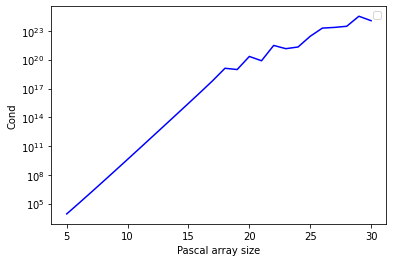

In [13]:
conds, dims= [], []
for n in range(5, 31):
    dims.append(n)
    conds.append(my_cond(my_pascal(n)))

plt.semilogy(dims, conds, color='blue')
plt.ylabel('Сond')
plt.xlabel('Pascal array size')
plt.legend()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [15]:
def prod_and_sq_sum(A):
    d = np.diag(A)
    return d.prod(), np.sum(d**2)

In [16]:
n = 3 # u can change
A = np.random.randint(1, 10, size=(n, n))
print(A)
print(prod_and_sq_sum(A))

[[3 4 9]
 [8 6 4]
 [4 9 3]]
(54, 54)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [28]:
def f(A, B, lmbd, k):
    m, n = A.shape[0], A.shape[1]
    k = min(k, n)
    A = A*lmbd.reshape((1, n))
    A = A[:, :k]
    B = B.T
    B = B[:, :k]
    return A.dot(B)


In [30]:
m, n = 3, 4
A = np.random.randint(1, 5, size=(m, n))
B = np.random.randint(1, 5, size=(m, n))
lmbd = np.random.randint(1, 5, size=(1, n))
print(A)
print(B)
print(lmbd)
print(f(A, B, lmbd, 10))

[[3 1 4 1]
 [4 4 4 3]
 [4 4 3 3]]
[[1 2 4 3]
 [3 2 1 3]
 [3 1 3 4]]
[[1 1 4 3]]
[[ 78  36  70]
 [103  63 100]
 [ 87  59  88]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [35]:
def get_diag(A, B):
    # Пришлось использовать соглашение Эйнштена
    result = np.einsum("ik,ki->i", A, B)
    return result

n = 3
A = np.random.randint(1, 5, size=(n, n))
B = np.random.randint(1, 5, size=(n, n))
print(A)
print(B)
print(get_diag(A, B))

[[1 1 3]
 [3 3 4]
 [4 3 4]]
[[3 1 4]
 [1 1 3]
 [1 4 3]]
[ 7 22 37]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [2]:
from math import cos, sin, radians


def shrink_rotate(x, a, coef=1., angle=0.):
    angle = radians(angle)
    new_end = (x - a)*(cos(angle) + 1j*sin(angle))
    new_end *= coef
    new_end += a
    return new_end


def shrink_rotate_conj(x, a, coef=1., angle=0.):
    # чтобы отразить y относительно горизонтальной прямой, нужно найти сопряжённое к y
    angle = radians(angle)
    new_end = (x - a)*(cos(angle) + 1j*sin(angle))
    new_end *= coef
    new_end = new_end.conjugate()
    new_end += a
    return new_end
    
def geometric_inverse(x, a, r):
    new_x = (x - a).conjugate()
    return r**2/new_x + a


(0.25+0.5j)
(0.25+1.5j)
(40-79j)


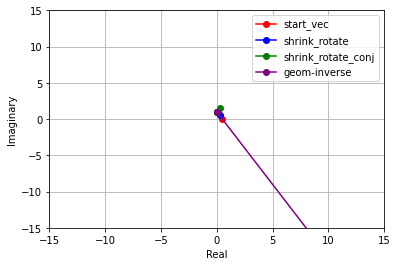

In [26]:
# чтобы проверить эти функции, я построила немножко графиков


dim = 15


def drawing_area():
    plt.xlim((-dim, dim))
    plt.ylim((-dim, dim))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.grid()
    plt.legend()
    plt.show()


def draw(vec, color='red', label='start_vec'):
    real = [vec[0].real, vec[len(vec) - 1].real]
    imag = [vec[0].imag, vec[len(vec) - 1].imag]
    plt.plot(real, imag, color, marker='o', label=label)


def check(start, end, angle=10, coef=2, r=10):
    v = np.array([start, end])
    draw(v)


    shrink_rotate_result = shrink_rotate(v[1], v[0], coef, angle)
    draw(np.array([v[0], shrink_rotate_result]), color='blue', label='shrink_rotate')
    print(shrink_rotate_result)


    shrink_rotate_conj_result =  shrink_rotate_conj(v[1], v[0], coef, angle)
    draw(np.array([v[0], shrink_rotate_conj_result]), color='green', label='shrink_rotate_conj')
    print(shrink_rotate_conj_result)


    geometric_inverse_result = geometric_inverse(v[1], v[0], r)
    draw(np.array([v[0], geometric_inverse_result]), color='purple', label='geom-inverse')
    print(geometric_inverse_result)


    drawing_area()

check(0 + 1.*1j, 0.5 + 0.*1j, coef=0.5, angle=0.)

**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

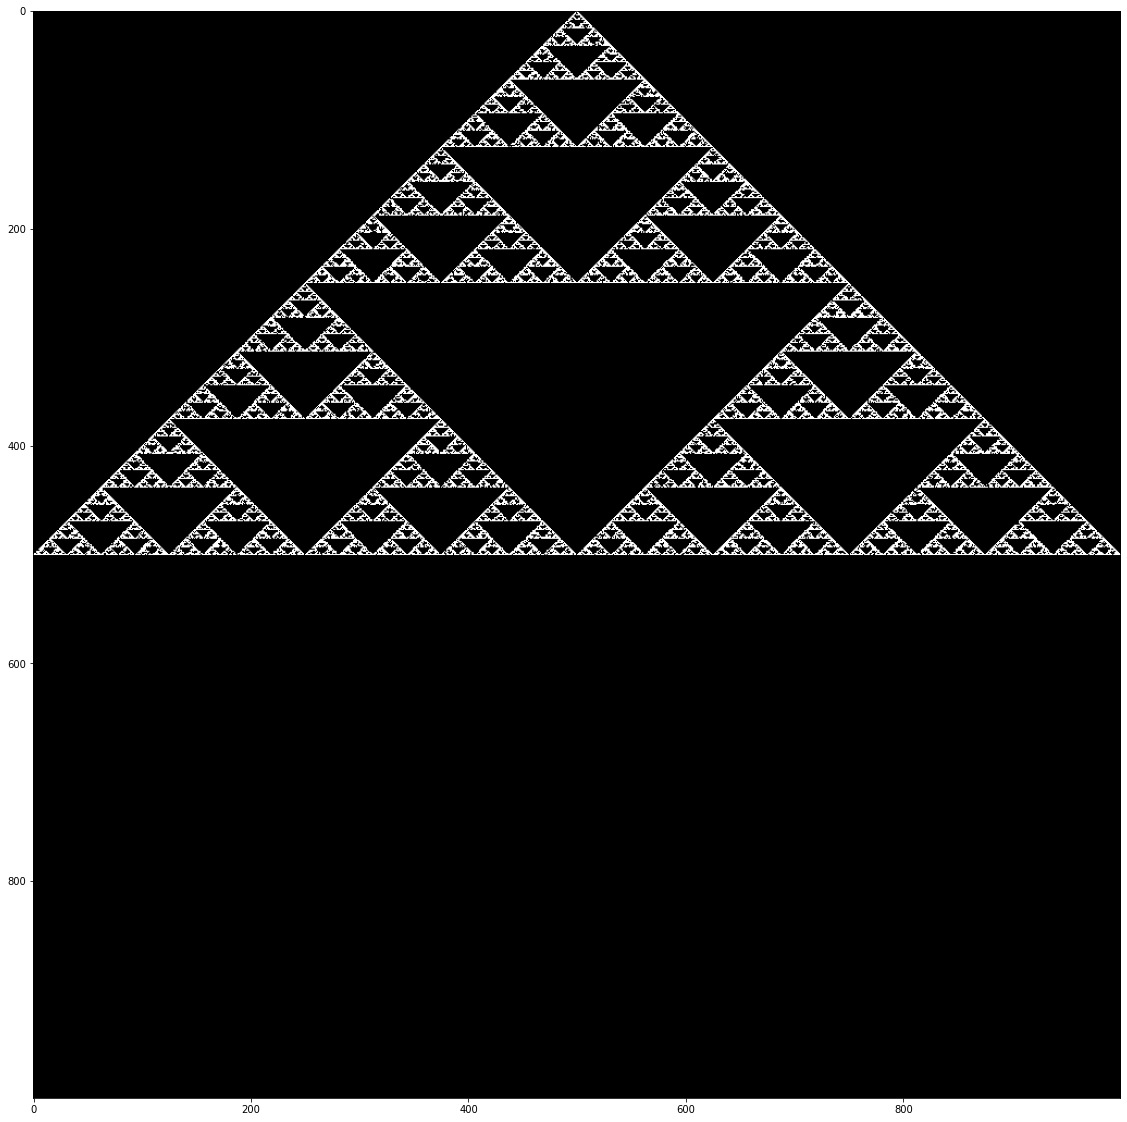

In [8]:
arr = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))]



for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int(-500 - z.imag * 500)
    y = int(500 + z.real * 500)
    arr[x][y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(arr, cmap='gray')



**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Во-первых, из-за того, что все коэффициенты меньше единицы, треугольники уменьшаются.

Во-вторых, фигура - по сути повторение операции разбиения треугольника на 4 подобных ему, один из которых получается перевернутым. Затем это же происходит во всех неперевернутых треугольниках


**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

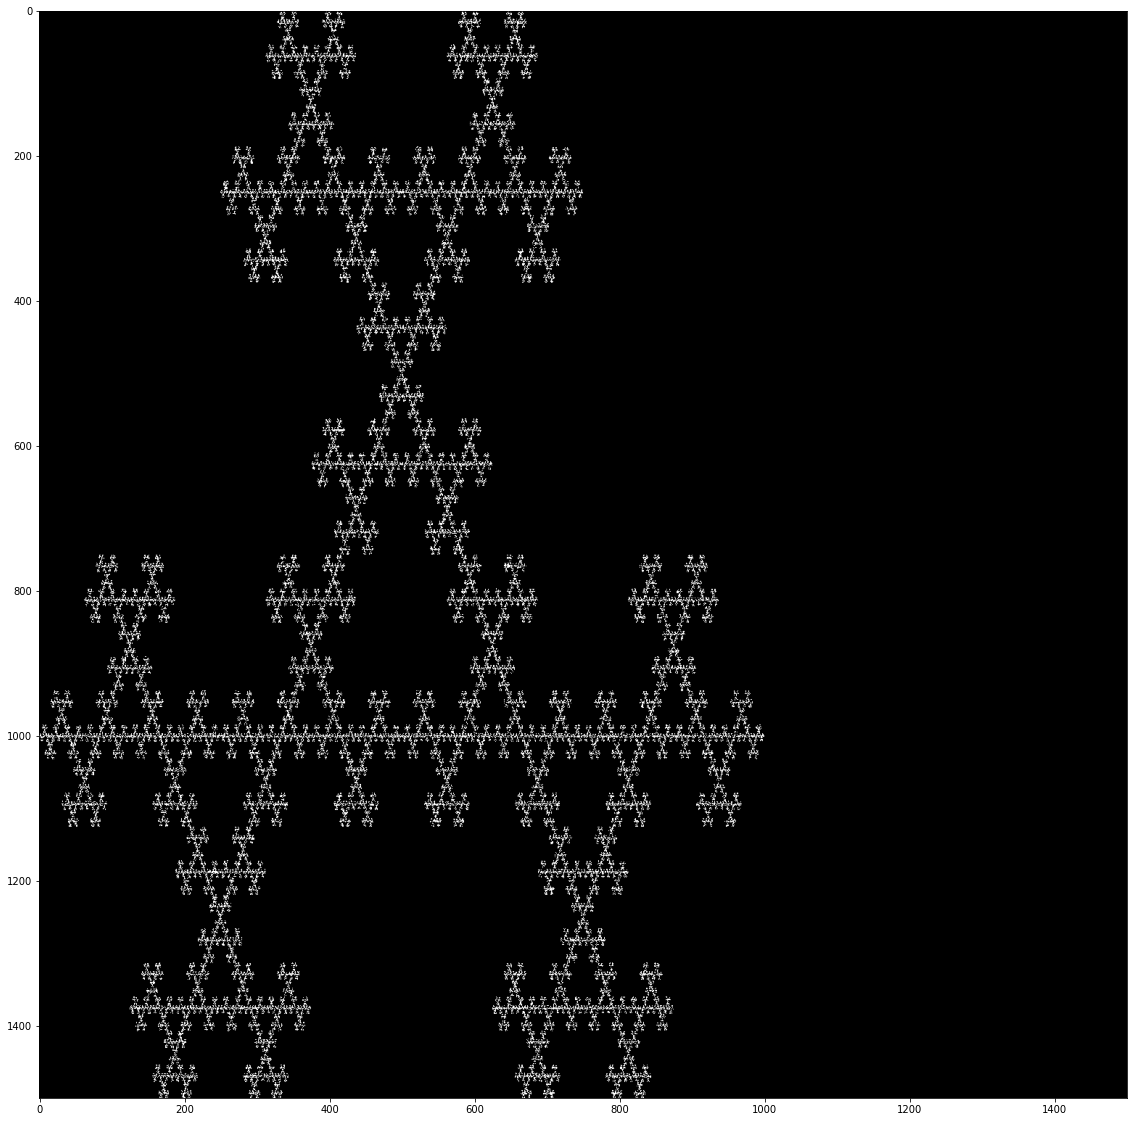

In [19]:
arr = np.zeros((1500, 1500))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))]



for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int(-500 - z.imag * 500)
    y = int(500 + z.real * 500)
    arr[x][y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(arr, cmap='gray')


## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [2]:
def gauss(A, B):
    try:
        return sla.solve(A, B)
    except:
        return None


def inverse(A, B):
    try:
        return np.dot(sla.inv(A), B)
    except:
        return None

55.1 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.9 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
83.9 µs ± 4.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
57.2 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
332 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 9.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1.46 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.01 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.96 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.36 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.2 ms ± 646 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
28.4 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
67.1 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


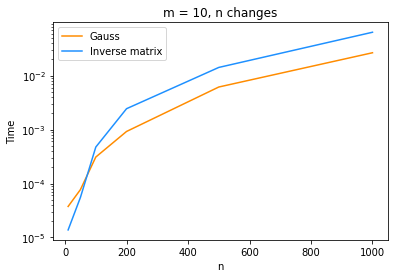

In [3]:
gauss_arr = []
inverse_arr = []
n_values = [10, 50, 100, 200, 500, 1000]
m = 10
for n in n_values:
    A, B = np.random.rand(n, n), np.random.rand(n, m)
    res_lib = %timeit -o gauss(A, B)
    gauss_arr.append(res_lib.best)
    res_my = %timeit -o inverse(A, B)
    inverse_arr.append(res_my.best)

plt.semilogy(n_values, gauss_arr, color='darkorange', label='Gauss')
plt.semilogy(n_values, inverse_arr, color='dodgerblue', label='Inverse matrix')
plt.title('m = 10, n changes')
plt.ylabel('Time')
plt.xlabel('n')
plt.legend()
# plt.show()


The slowest run took 46.57 times longer than the fastest. This could mean that an intermediate result is being cached.
3.67 ms ± 4.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 5.16 times longer than the fastest. This could mean that an intermediate result is being cached.
2.47 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 11.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1.93 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.32 ms ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
670 µs ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.14 ms ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.63 times longer than the fastest. This could mean that an intermediate result is being cached.
3.23 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.71 ms ± 286 µs 

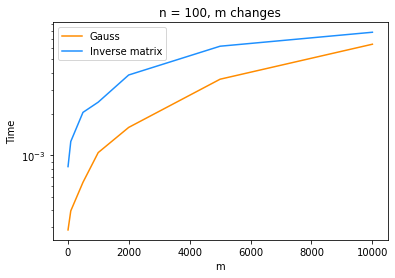

In [5]:
gauss_arr = []
inverse_arr = []
m_values = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for m in m_values:
    A, B = np.random.rand(n, n), np.random.rand(n, m)
    res_lib = %timeit -o gauss(A, B)
    gauss_arr.append(res_lib.best)
    res_my = %timeit -o inverse(A, B)
    inverse_arr.append(res_my.best)

plt.semilogy(m_values, gauss_arr, color='darkorange', label='Gauss')
plt.semilogy(m_values, inverse_arr, color='dodgerblue', label='Inverse matrix')
plt.title('n = 100, m changes')
plt.ylabel('Time')
plt.xlabel('m')
plt.legend()

Метод Гаусса более эффективен при больших данных, так как, видимо, элементарные преобразования строк происходят быстрее, чем нахождение обратной матрицы, которая, видимо, находится через определитель
